# Regression Analysis on Housing Data

Import the required libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('melbourne_housing.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,2,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067,3,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13579.000000,1.357900e+04,13579.000000,13579.000000,13579.000000,13579.000000,13517.000000,13579.000000,7129.000000,8204.000000,13579.000000,13579.000000,13579.000000
mean,2.937992,1.075675e+06,10.137477,3105.298697,2.914721,1.534281,1.609899,558.397820,151.972555,1964.777913,-37.809198,144.995207,7453.982031
std,0.955783,6.393334e+05,5.868838,90.679528,0.965956,0.691722,0.962450,3990.815622,541.052328,36.296864,0.079261,0.103914,4378.449080
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856810,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802350,145.000100,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058250,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13579 entries, 0 to 13578
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13579 non-null  object 
 1   Address        13579 non-null  object 
 2   Rooms          13579 non-null  int64  
 3   Type           13579 non-null  object 
 4   Price          13579 non-null  int64  
 5   Method         13579 non-null  object 
 6   SellerG        13579 non-null  object 
 7   Date           13579 non-null  object 
 8   Distance       13579 non-null  float64
 9   Postcode       13579 non-null  int64  
 10  Bedroom2       13579 non-null  int64  
 11  Bathroom       13579 non-null  int64  
 12  Car            13517 non-null  float64
 13  Landsize       13579 non-null  int64  
 14  BuildingArea   7129 non-null   float64
 15  YearBuilt      8204 non-null   float64
 16  CouncilArea    12210 non-null  object 
 17  Lattitude      13579 non-null  float64
 18  Longti

In [6]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

### Drop nas

In [7]:
df = df.dropna(subset=['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car'], how='any')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/5/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019


## Preprocessing

### Drop unique identifiers

In [8]:
df = df.drop(columns=['Address'])
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
4,Abbotsford,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
6,Abbotsford,3,h,1876000,S,Nelson,7/5/2016,2.5,3067,4,2,0.0,245,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019
7,Abbotsford,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,2,1,2.0,256,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019


### Put dates in their own columns

In [9]:
df[['Day', 'Month', 'Year']] = df['Date'].str.split('/', expand=True)

### Remove date column

In [10]:
df = df.drop(columns=['Date'])

### Encode strings to integers

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.select_dtypes(include=[object]).columns:
    le.fit(df[col])
    df[col] = le.transform(df[col])

In [12]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Day,Month,Year
1,0,2,0,1035000,1,18,2.5,3067,2,1,0.0,156,79.0,1900.0,29,-37.8079,144.9934,2,4019,22,11,0
2,0,3,0,1465000,3,18,2.5,3067,3,2,0.0,134,150.0,1900.0,29,-37.8093,144.9944,2,4019,22,12,1
4,0,4,0,1600000,4,112,2.5,3067,3,1,2.0,120,142.0,2014.0,29,-37.8072,144.9941,2,4019,22,15,0
6,0,3,0,1876000,1,112,2.5,3067,4,2,0.0,245,210.0,1910.0,29,-37.8024,144.9993,2,4019,24,14,0
7,0,2,0,1636000,1,112,2.5,3067,2,1,2.0,256,107.0,1890.0,29,-37.8060,144.9954,2,4019,25,8,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6195 entries, 1 to 12211
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6195 non-null   int32  
 1   Rooms          6195 non-null   int64  
 2   Type           6195 non-null   int32  
 3   Price          6195 non-null   int64  
 4   Method         6195 non-null   int32  
 5   SellerG        6195 non-null   int32  
 6   Distance       6195 non-null   float64
 7   Postcode       6195 non-null   int64  
 8   Bedroom2       6195 non-null   int64  
 9   Bathroom       6195 non-null   int64  
 10  Car            6195 non-null   float64
 11  Landsize       6195 non-null   int64  
 12  BuildingArea   6195 non-null   float64
 13  YearBuilt      6195 non-null   float64
 14  CouncilArea    6195 non-null   int32  
 15  Lattitude      6195 non-null   float64
 16  Longtitude     6195 non-null   float64
 17  Regionname     6195 non-null   int32  
 18  Propert

**Everything is a number now**

## Split data into test and train data

In [14]:
X = df.drop('Price', axis=1)
y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

## Create Basic Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# predict
predicted = lr.predict(X_test)

## Evaluate model

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("R-Squared Score: ", r2_score(y_test, predicted))
print("Mean Squared Error: ", mean_squared_error(y_test, predicted))
print("Mean Absolute Error: ", mean_absolute_error(y_test, predicted))

R-Squared Score:  0.6015382891658352
Mean Squared Error:  189590169035.5514
Mean Absolute Error:  260208.8012485054


What is this saying above? The R-Squared score gives a basic idea of how well the model performed overall. It was able to explain 59% of variance in the data. That means that the model may have been really close to getting it right sometimes, and really far off other times. So cancelling out its wins and losses, it got a score of about 59%.

As far as I can tell, the Mean Squared Error is a number that by itself doesn't mean much without context. The number is super high because we are looking at housing prices which are in the thousands or millions of dollars in value. That means that if we were off the prediction by $1000 (which isn't actually very much), we then *square* it to get an error value of 1,000,000. So imagine if we were actually off by 1,000,000. Then we would have to square that number to get the square error value, 1,000,000,000,000. That metric should be compared to the Mean Absolute Error. If MSE is really different from the MAE (which is clearly is), then that means that there are some really extreme values that the model isn't predicting very well.

The Mean Absolute Error is taking the difference between what we predicted and the actual value and then adding it all together. So if we predicted 384,000 and it was actually 385,000, then we add 1000 to the error score. The difference between this score and the previous one is that the values aren't square here. Thus, the extreme values aren't emphasized as much.

What do we do with this information? We should now try to tune our model to make it better and see if we can improve these scores (increase R-Squared and decrease MAE and MSE).

## Polynomial Regression
### 2nd degree

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False) # I found out that include_bias=False means that we'll use these features in the linear regression later
poly_features_2 = poly.fit_transform(X_train)

# Start making the linear regression model again
lr_2 = LinearRegression()
lr_2.fit(poly_features_2, y_train) # poly_features is just a polynomial version of X_train
predicted_2 = lr_2.predict(poly_features_2)

In [18]:
print("R-Squared Score: ", r2_score(y_train, predicted_2))
print("Mean Squared Error: ", mean_squared_error(y_train, predicted_2))
print("Mean Absolute Error: ", mean_absolute_error(y_train, predicted_2))

R-Squared Score:  0.8216818475325868
Mean Squared Error:  79754462956.60902
Mean Absolute Error:  184187.71579322955


So it looks like the 2nd-degree polynomial model does perform a little better than the first linear model. The R-Squared score is 82% instead of 59%, the MSE is 79,176,160,176 instead of 190,230,548,100, and the MAE is 184,630 instead of 259,864.

I'm also going to try a 3rd-degree polynomial.

### 3rd degree

In [19]:
poly = PolynomialFeatures(3, include_bias=False)
poly_features_3 = poly.fit_transform(X_train)

lr_3 = LinearRegression()
lr_3.fit(poly_features_3, y_train) 
predicted_3 = lr_3.predict(poly_features_3)

print("R-Squared Score: ", r2_score(y_train, predicted_3))
print("Mean Squared Error: ", mean_squared_error(y_train, predicted_3))
print("Mean Absolute Error: ", mean_absolute_error(y_train, predicted_3))

R-Squared Score:  0.9040947485909484
Mean Squared Error:  42894521477.53311
Mean Absolute Error:  158181.59443803292


Now the R-Squared score is 90% instead of 82%, the MSE is 42,894,521,477 instead of 79,176,160,176, and the MAE is 158,181 instead of 184,630. It might be a little different when you run it. This might be telling us that the model is adapting more.

We'll throw in a fourth degree model just for kicks.

In [28]:
poly = PolynomialFeatures(4, include_bias=False)
poly_features_4 = poly.fit_transform(X_train)

lr_4 = LinearRegression()
lr_4.fit(poly_features_4, y_train) 
predicted_4 = lr_4.predict(poly_features_4)

print("R-Squared Score: ", r2_score(y_train, predicted_4))
print("Mean Squared Error: ", mean_squared_error(y_train, predicted_4))
print("Mean Absolute Error: ", mean_absolute_error(y_train, predicted_4))

R-Squared Score:  0.9999855952024167
Mean Squared Error:  6442680.564811138
Mean Absolute Error:  1785.8853659273514


This one actually surprised me. This has an extremely high R-Squared value (99%), a low Mean Squared Error (6,442,680 compared to 424,894,521,477) and a low Mean Absolute Error (1785 compared to 158,181). That probably means that this model is performing well, but it is probably also be overfitting. That's something I would need to do more research on how to calculate that and visualize it.

### Permutation Importance
We have many variables in the data set, but we can only graph two dimensions in a scatter plot. Because of this, we will use sklearn to figure out which variable is the most important so that we can plot it against `Price`.

Note that because we are using many variables, we won't be able to see all of the errors in the graph. If only we had the ability to see in multiple dimensions...

In [21]:
from sklearn.inspection import permutation_importance
features = permutation_importance(lr, X_test, y_test)
for i in features.importances_mean.argsort()[::-1]: # I got this code online btw https://scikit-learn.org/stable/modules/permutation_importance.html
    print(df.columns[i], "importance: \t",features.importances_mean[i])

SellerG importance: 	 0.28764832893523146
Bedroom2 importance: 	 0.09800466786312934
Type importance: 	 0.07919012438022617
Landsize importance: 	 0.070715641495726
Rooms importance: 	 0.06528187644634187
BuildingArea importance: 	 0.05872050963472901
Lattitude importance: 	 0.05121552875399475
Distance importance: 	 0.026747568276642465
CouncilArea importance: 	 0.020368727693720112
Bathroom importance: 	 0.012560091663787066
Longtitude importance: 	 0.010622405329261286
YearBuilt importance: 	 0.0071163425919216206
Month importance: 	 0.0033512215749247343
Suburb importance: 	 0.003152739484320022
Car importance: 	 0.0026294522142042086
Day importance: 	 0.001176197514106736
Method importance: 	 0.0005226292771816965
Propertycount importance: 	 0.00022900717088043533
Price importance: 	 0.00015022250898986123
Regionname importance: 	 2.4634250139765612e-06
Postcode importance: 	 -1.905840003586512e-05


It looks like `SellerG` might be the variable with the highest impact on Price

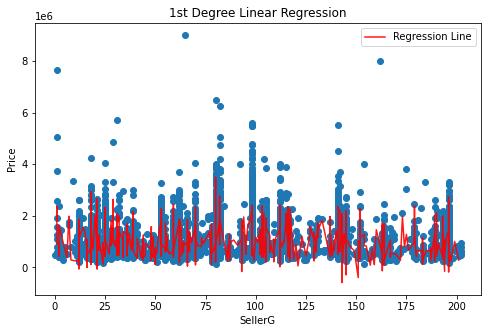

In [22]:
# This code copies the X_test dataframe and then adds the predictions on as another column `Price`. It's for sorting, for the plots.
df_test = X_test.copy()
df_test['Price'] = predicted
df_test = df_test.sort_values(by='SellerG')

plt.figure(figsize=(8, 5))
plt.title("1st Degree Linear Regression")
plt.ylabel('Price')
plt.xlabel('SellerG')
plt.scatter(df['SellerG'], df['Price'])
plt.plot(df_test['SellerG'], df_test['Price'], alpha=.9, color='red', label='Regression Line')


plt.legend()
plt.show()

Yep. That's the regression line. Looks kind of messy.

The line pretty much goes back and forth between points and just makes a mess in the visualization because `SellerG` isn't the only variable affecting the `Price`. That and you can't also say that "as the SellerG goes up, so does the price" or anything like that. In reality, to make this better, we might need to remove the `SellerG` variable or use a different variable (continuous) to visualize.

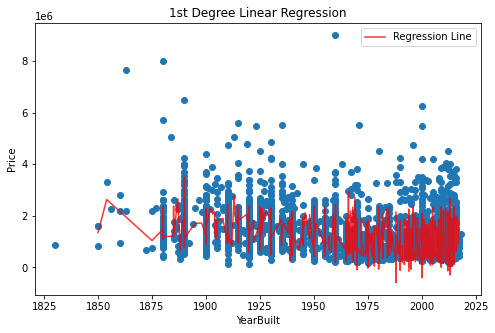

In [23]:
df_test = df_test.sort_values(by='YearBuilt')

plt.figure(figsize=(8, 5))
plt.title("1st Degree Linear Regression")
plt.ylabel('Price')
plt.xlabel('YearBuilt')
plt.scatter(df['YearBuilt'], df['Price'])
plt.plot(df_test['YearBuilt'], df_test['Price'], alpha=.8, color='red', label='Regression Line')


plt.legend()
plt.show()

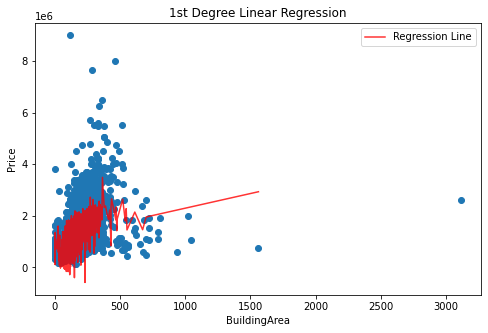

In [24]:
df_test = df_test.sort_values(by='BuildingArea')

plt.figure(figsize=(8, 5))
plt.title("1st Degree Linear Regression")
plt.ylabel('Price')
plt.xlabel('BuildingArea')
plt.scatter(df['BuildingArea'], df['Price'])
plt.plot(df_test['BuildingArea'], df_test['Price'], alpha=.8, color='red', label='Regression Line')


plt.legend()
plt.show()

Now let's plot the 2nd and 3rd-degree regression models. I'll just do `YearBuilt` for them.

### 2nd degree

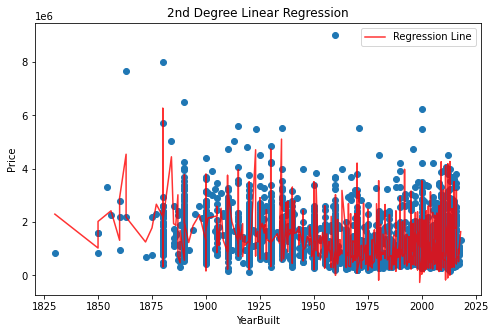

In [25]:
df_train = X_train.copy()
df_train['Price'] = predicted_2
df_train = df_train.sort_values(by='YearBuilt')

plt.figure(figsize=(8, 5))
plt.title("2nd Degree Linear Regression")
plt.ylabel('Price')
plt.xlabel('YearBuilt')
plt.scatter(df['YearBuilt'], df['Price'])
plt.plot(df_train['YearBuilt'], df_train['Price'], alpha=.8, color='red', label='Regression Line')

plt.legend()
plt.show()

### 3rd degree

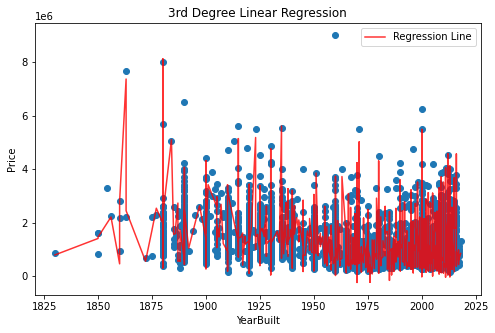

In [26]:
df_train = X_train.copy()
df_train['Price'] = predicted_3
df_train = df_train.sort_values(by='YearBuilt')

plt.figure(figsize=(8, 5))
plt.title("3rd Degree Linear Regression")
plt.ylabel('Price')
plt.xlabel('YearBuilt')
plt.scatter(df['YearBuilt'], df['Price'])
plt.plot(df_train['YearBuilt'], df_train['Price'], alpha=.8, color='red', label='Regression Line')

plt.legend()
plt.show()

### 4th degree

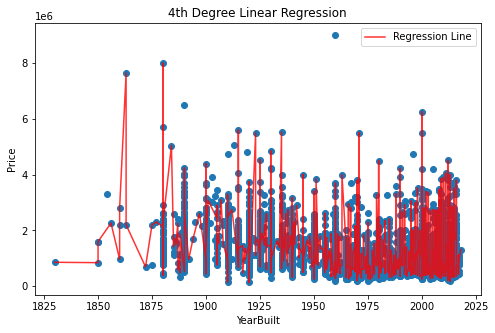

In [27]:
df_train = X_train.copy()
df_train['Price'] = predicted_4
df_train = df_train.sort_values(by='YearBuilt')

plt.figure(figsize=(8, 5))
plt.title("4th Degree Linear Regression")
plt.ylabel('Price')
plt.xlabel('YearBuilt')
plt.scatter(df['YearBuilt'], df['Price'])
plt.plot(df_train['YearBuilt'], df_train['Price'], alpha=.8, color='red', label='Regression Line')

plt.legend()
plt.show()